Jumlah data:
Train: 2579, Dev: 350, Test: 687

Durasi audio (detik):
count       2579
unique       353
top       145920
freq          31
Name: duration, dtype: object

Distribusi gender:
gender
FEMALE    1487
MALE      1073
Name: count, dtype: int64

Statistik panjang teks (karakter dan kata):
       text_length_char  text_length_word
count       2579.000000       2579.000000
mean         135.648313         18.950756
std           45.646498          6.334874
min           35.000000          4.000000
25%          103.000000         14.000000
50%          132.000000         18.000000
75%          162.000000         23.000000
max          367.000000         49.000000


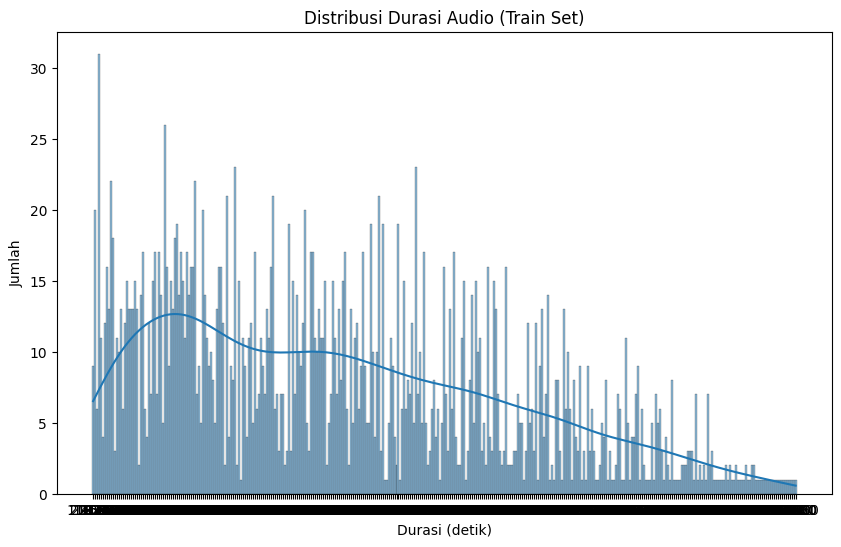

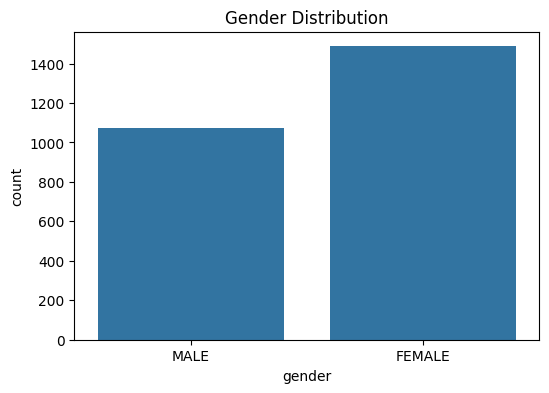


Missing Values:
index                0
file                 0
raw_text             0
normalized_text      0
phoneme              0
duration             0
gender              19
audio                0
text_length_char     0
text_length_word     0
dtype: int64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

DATA_DIR = "Fine-Tuning/Dataset/HF_id/"

columns = ["index", "file", "raw_text", "normalized_text", "phoneme", "duration", "gender"]

train_df = pd.read_csv(os.path.join(DATA_DIR, 'train.tsv'), sep='\t', names=columns)
dev_df = pd.read_csv(os.path.join(DATA_DIR, 'dev.tsv'), sep='\t', names=columns)
test_df = pd.read_csv(os.path.join(DATA_DIR, 'test.tsv'), sep='\t', names=columns)

train_df['audio'] = train_df['file'].apply(lambda x: os.path.join(DATA_DIR, 'train', x))
dev_df['audio'] = dev_df['file'].apply(lambda x: os.path.join(DATA_DIR, 'dev', x))
test_df['audio'] = test_df['file'].apply(lambda x: os.path.join(DATA_DIR, 'test', x))

# Load TSV File
def load_fleurs_tsv(tsv_path, split_name):
    df = pd.read_csv(tsv_path, sep='\t', header=None)
    df.columns = ["index", "file", "raw_text", "normalized_text", "phoneme", "duration", "gender"]
    
    # Prefix the audio path with split folder name
    df["file"] = df["file"].apply(lambda x: os.path.join(DATA_DIR, split_name, x))
    
    return df[["file", "normalized_text"]].rename(columns={"file": "audio", "normalized_text": "sentence"})

# Contoh EDA
print("Jumlah data:")
print(f"Train: {len(train_df)}, Dev: {len(dev_df)}, Test: {len(test_df)}")

# Duration statistics
print("\nDurasi audio (detik):")
print(train_df['duration'].describe())

# Gender distribution
print("\nDistribusi gender:")
print(train_df['gender'].value_counts())

# Panjang raw_text
train_df['text_length_char'] = train_df['raw_text'].apply(len)
train_df['text_length_word'] = train_df['raw_text'].apply(lambda x: len(x.split()))

print("\nStatistik panjang teks (karakter dan kata):")
print(train_df[['text_length_char', 'text_length_word']].describe())

# Plot distribusi durasi
plt.figure(figsize=(10, 6))
sns.histplot(train_df['duration'], bins=50, kde=True)
plt.title('Distribusi Durasi Audio (Train Set)')
plt.xlabel('Durasi (detik)')
plt.ylabel('Jumlah')
plt.show()

# Plot distribusi gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=train_df)
plt.title('Gender Distribution')
plt.show()

# Cek missing values
print("\nMissing Values:")
print(train_df.isnull().sum())

C:\Users\dephm\AppData\Local\Temp\ipykernel_31064\272769642.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='gender', data=train_df, palette=['#757575'], width=0.6)  # Lebar batang disempitkan
C:\Users\dephm\AppData\Local\Temp\ipykernel_31064\272769642.py:8: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x='gender', data=train_df, palette=['#757575'], width=0.6)  # Lebar batang disempitkan


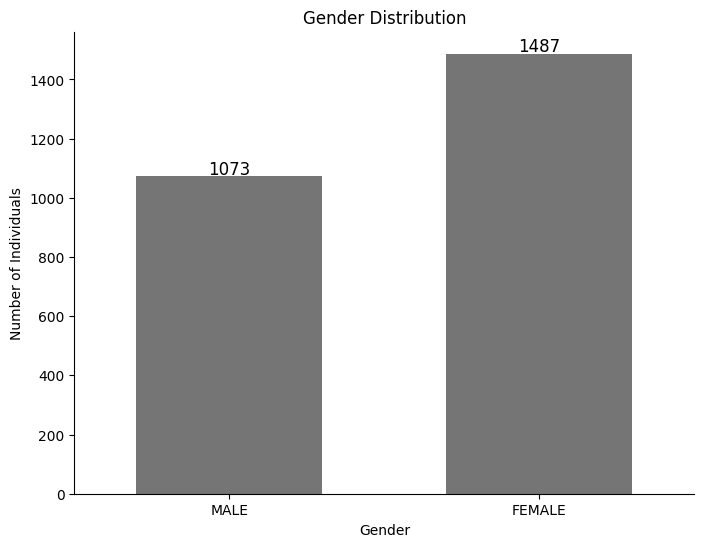

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi gender dengan warna abu-abu
plt.figure(figsize=(8, 6))  # Ukuran plot yang tetap seperti sebelumnya (lebih lebar)

# Membuat plot countplot dengan dua warna abu-abu yang berbeda dan batang lebih sempit
ax = sns.countplot(x='gender', data=train_df, palette=['#757575'], width=0.6)  # Lebar batang disempitkan

# Mengubah label sumbu Y untuk menunjukkan jumlah orang (bukan 'count')
plt.ylabel('Number of Individuals')  # Mengubah label y-axis
plt.xlabel('Gender')  # Menambahkan label sumbu X

# Menambahkan angka di atas batang, tanpa desimal
for p in ax.patches:
    # Menggunakan format integer untuk memastikan angka tanpa desimal
    ax.annotate(f'{int(p.get_height())}',  # Menampilkan angka bulat tanpa .0
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi x dan y dari angka
                ha='center', va='center',  # Horizontal dan vertikal alignment
                xytext=(0, 5),  # Menambahkan sedikit jarak antara angka dan batang
                textcoords='offset points', color='black', fontsize=12)  # Pengaturan teks

# Menghapus garis di kanan dan atas
sns.despine()  # Secara otomatis menghapus garis kanan dan atas

# Memberikan judul pada grafik
plt.title('Gender Distribution')

# Menampilkan plot
plt.show()

In [9]:
print(train_df['gender'].unique())

['MALE' 'FEMALE' nan]


C:\Users\dephm\AppData\Local\Temp\ipykernel_31064\3181992439.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='gender', y='percentage', data=gender_percent_df, palette=color_dict, width=0.6)


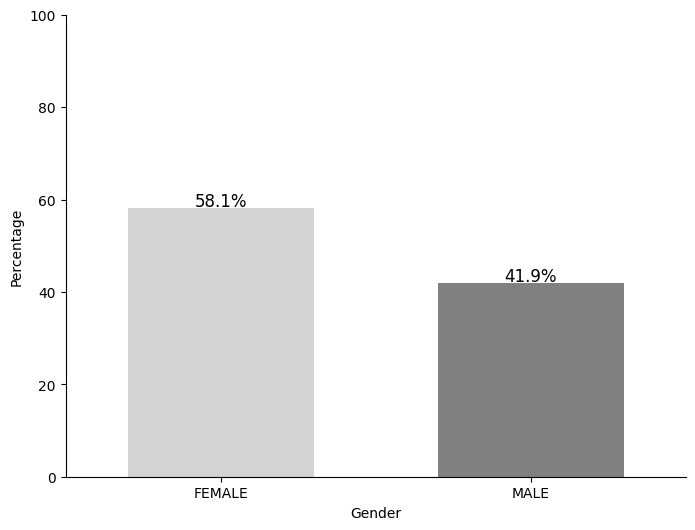

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Hitung persentase distribusi gender
gender_counts = train_df['gender'].value_counts(normalize=True) * 100
gender_percent_df = pd.DataFrame({
    'gender': gender_counts.index,
    'percentage': gender_counts.values
})

# Mapping warna sesuai gender
color_dict = {
    'FEMALE': 'lightgrey',
    'MALE': 'grey'
}

# Gunakan dictionary sebagai palette
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='gender', y='percentage', data=gender_percent_df, palette=color_dict, width=0.6)

# Label sumbu
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.ylim(0, 100)

# Tambahkan label persentase di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points', 
                color='black', fontsize=12)

# Hapus garis tepi
sns.despine()

# Judul plot

# Tampilkan plot
plt.show()


In [ ]:
import librosa
import numpy as np

# Fungsi untuk membaca audio dan mendapatkan informasi frekuensi
def plot_audio_spectrum(audio_path):
    try:
        # Membaca file audio
        y, sr = librosa.load(audio_path, sr=None)  # sr=None untuk mempertahankan sample rate asli
        
        # Hitung spektrum frekuensi menggunakan Fast Fourier Transform (FFT)
        D = np.abs(librosa.stft(y))  # Short-Time Fourier Transform
        S_db = librosa.amplitude_to_db(D, ref=np.max)  # Mengkonversi ke dB untuk visualisasi
        
        # Plot spektrum frekuensi
        plt.figure(figsize=(12, 6))
        librosa.display.specshow(S_db, x_axis='time', y_axis='log', sr=sr)
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Spektrum Frekuensi dari {audio_path}")
        plt.show()
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")

# Menganalisis beberapa file audio di dataset (misalnya, 5 pertama)
for i in range(min(5, len(train_df))):  # Menampilkan spektrum untuk 5 file pertama
    audio_path = train_df.iloc[i]['audio']
    plot_audio_spectrum(audio_path)

# Menganalisis distribusi durasi audio
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['duration'])
plt.title('Distribusi Durasi Audio (Train Set) - Boxplot')
plt.xlabel('Durasi (detik)')
plt.show()

# Mencari outlier pada durasi audio
Q1 = train_df['duration'].quantile(0.25)
Q3 = train_df['duration'].quantile(0.75)
IQR = Q3 - Q1
outliers = train_df[(train_df['duration'] < (Q1 - 1.5 * IQR)) | (train_df['duration'] > (Q3 + 1.5 * IQR))]

print("\nOutliers pada durasi audio:")
print(outliers[['file', 'duration']])

# Visualisasi distribusi panjang teks (jumlah karakter dan kata)
plt.figure(figsize=(12, 6))
sns.histplot(train_df['text_length_char'], kde=True, bins=50)
plt.title('Distribusi Panjang Teks (Karakter) pada Train Set')
plt.xlabel('Panjang Teks (Karakter)')
plt.ylabel('Jumlah')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(train_df['text_length_word'], kde=True, bins=50)
plt.title('Distribusi Panjang Teks (Kata) pada Train Set')
plt.xlabel('Panjang Teks (Kata)')
plt.ylabel('Jumlah')
plt.show()

# Jika memungkinkan, kita bisa mengeksplorasi distribusi frekuensi sampling
# Namun ini hanya jika kita dapat mengekstrak frekuensi sampling dari file audio yang ada

# Cek apakah ada anomali pada file audio yang tidak bisa dibaca atau di-load
invalid_audio_files = []
for i in range(min(10, len(train_df))):  # Mengecek 10 file pertama
    try:
        audio_path = train_df.iloc[i]['audio']
        librosa.load(audio_path, sr=None)
    except Exception as e:
        invalid_audio_files.append(audio_path)

if invalid_audio_files:
    print("\nBeberapa file audio tidak dapat dibaca:")
    for file in invalid_audio_files:
        print(file)
else:
    print("\nSemua file audio dapat dibaca dengan sukses.")


In [ ]:
import librosa
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk membaca audio dan mendapatkan informasi frekuensi
def plot_audio_spectrum(audio_path):
    try:
        # Membaca file audio
        y, sr = librosa.load(audio_path, sr=None)  # sr=None untuk mempertahankan sample rate asli
        
        # Hitung spektrum frekuensi menggunakan Fast Fourier Transform (FFT)
        D = np.abs(librosa.stft(y))  # Short-Time Fourier Transform
        S_db = librosa.amplitude_to_db(D, ref=np.max)  # Mengkonversi ke dB untuk visualisasi
        
        # Plot spektrum frekuensi
        plt.figure(figsize=(12, 6))
        librosa.display.specshow(S_db, x_axis='time', y_axis='log', sr=sr)
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Spektrum Frekuensi dari {audio_path}")
        plt.show()
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")

# Cek jika kolom duration sudah berupa numerik
train_df['duration'] = pd.to_numeric(train_df['duration'], errors='coerce')

# Menganalisis distribusi durasi audio
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['duration'])
plt.title('Distribusi Durasi Audio (Train Set) - Boxplot')
plt.xlabel('Durasi (detik)')
plt.show()

# Mencari outlier pada durasi audio
Q1 = train_df['duration'].quantile(0.25)
Q3 = train_df['duration'].quantile(0.75)
IQR = Q3 - Q1
outliers = train_df[(train_df['duration'] < (Q1 - 1.5 * IQR)) | (train_df['duration'] > (Q3 + 1.5 * IQR))]

print("\nOutliers pada durasi audio:")
print(outliers[['file', 'duration']])

# Visualisasi distribusi panjang teks (jumlah karakter dan kata)
plt.figure(figsize=(12, 6))
sns.histplot(train_df['text_length_char'], kde=True, bins=50)
plt.title('Distribusi Panjang Teks (Karakter) pada Train Set')
plt.xlabel('Panjang Teks (Karakter)')
plt.ylabel('Jumlah')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(train_df['text_length_word'], kde=True, bins=50)
plt.title('Distribusi Panjang Teks (Kata) pada Train Set')
plt.xlabel('Panjang Teks (Kata)')
plt.ylabel('Jumlah')
plt.show()

# Jika memungkinkan, kita bisa mengeksplorasi distribusi frekuensi sampling
# Namun ini hanya jika kita dapat mengekstrak frekuensi sampling dari file audio yang ada

# Cek apakah ada anomali pada file audio yang tidak bisa dibaca atau di-load
invalid_audio_files = []
for i in range(min(10, len(train_df))):  # Mengecek 10 file pertama
    try:
        audio_path = train_df.iloc[i]['audio']
        librosa.load(audio_path, sr=None)
    except Exception as e:
        invalid_audio_files.append(audio_path)

if invalid_audio_files:
    print("\nBeberapa file audio tidak dapat dibaca:")
    for file in invalid_audio_files:
        print(file)
else:
    print("\nSemua file audio dapat dibaca dengan sukses.")


In [ ]:
from pydub import AudioSegment
import os

def check_audio_with_pydub(audio_path):
    try:
        # Coba load file audio dengan pydub
        audio = AudioSegment.from_file(audio_path)
        print(f"File audio {audio_path} berhasil dibaca!")
        return True
    except Exception as e:
        print(f"Error memproses file {audio_path}: {e}")
        return False

# Cek beberapa file audio
for i in range(min(5, len(train_df))):
    audio_path = train_df.iloc[i]['audio']
    check_audio_with_pydub(audio_path)

import os

# Cek beberapa file audio apakah ada atau tidak
for audio_file in ['3549896836540586488.wav', '8354944014602043182.wav', '4298457012716443153.wav']:
    audio_path = os.path.join("Fine-Tuning/Dataset/HF_id/train", audio_file)
    if os.path.exists(audio_path):
        print(f"File {audio_path} ada.")
    else:
        print(f"File {audio_path} tidak ditemukan.")

In [ ]:
import librosa

# Estimasi sample rate (misalnya 16kHz), bisa disesuaikan sesuai dataset
SAMPLE_RATE = 16000

# Estimasi total durasi dalam jam
total_duration_hours = train_df['duration'].sum() / 3600
print(f"\nTotal durasi data train: {total_duration_hours:.2f} jam")

# Plot distribusi panjang teks (dalam kata)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length_word'], bins=40, kde=True)
plt.title('Distribusi Panjang Kalimat (Dalam Kata) - Train Set')
plt.xlabel('Jumlah Kata')
plt.ylabel('Jumlah')
plt.show()

# Plot distribusi panjang karakter
plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length_char'], bins=40, kde=True, color='orange')
plt.title('Distribusi Panjang Kalimat (Dalam Karakter) - Train Set')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
from collections import Counter
from wordcloud import WordCloud

all_words = " ".join(train_df['raw_text'].tolist()).lower().split()
word_freq = Counter(all_words)

print(f"\nJumlah total kata: {len(all_words)}")
print(f"Jumlah unik kata: {len(set(all_words))}")
print("10 kata paling sering muncul:")
print(word_freq.most_common(10))

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Kata yang Paling Sering Muncul")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='duration', data=train_df)
plt.title('Durasi Audio per Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='text_length_word', data=train_df)
plt.title('Panjang Kalimat (kata) per Gender')
plt.show()

In [ ]:
import os
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

# Folder dataset
DATA_DIR = "Fine-Tuning/Dataset/HF_id/"

# Kolom pada file TSV
columns = ["index", "file", "raw_text", "normalized_text", "phoneme", "duration", "gender"]

# Tambahkan path audio ke kolom baru
train_df['audio'] = train_df['file'].apply(lambda x: os.path.join(DATA_DIR, 'audio', 'train', x))
dev_df['audio'] = dev_df['file'].apply(lambda x: os.path.join(DATA_DIR, 'audio', 'dev', x))
test_df['audio'] = test_df['file'].apply(lambda x: os.path.join(DATA_DIR, 'audio', 'test', x))

# Cek sample rate
sample_rates = []

print("🔍 Memeriksa sample rate setiap file audio (mungkin butuh waktu)...")
for file_path in train_df['audio']:
    try:
        _, sr = librosa.load(file_path, sr=None)  # Tidak auto-resample
        sample_rates.append(sr)
    except Exception as e:
        print(f"Gagal membaca file {file_path}: {e}")
        sample_rates.append(None)

# Tambahkan ke DataFrame
train_df['sample_rate'] = sample_rates

# Summary distribusi sample rate
print("\nDistribusi Sample Rate:")
print(train_df['sample_rate'].value_counts(dropna=False))

# Visualisasi distribusi sample rate
plt.figure(figsize=(8, 5))
sns.countplot(x='sample_rate', data=train_df)
plt.title('Distribusi Sample Rate (Hz) - Train Set')
plt.xlabel('Sample Rate (Hz)')
plt.ylabel('Jumlah File')
plt.show()

# Cek apakah semua sudah 16kHz
if train_df['sample_rate'].nunique() == 1 and train_df['sample_rate'].iloc[0] == 16000:
    print("\n✅ Semua file audio sudah di-resample ke 16kHz.")
else:
    print("\n⚠️ Terdapat file audio yang belum di-resample ke 16kHz.")
